# Ejercicio 4

### 1. Importacion de bibliotecas y carga de datos

In [38]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm

# visualización
plt.style.use('ggplot')
%matplotlib inline

Cargar los datasetes

In [3]:
# Cargar los datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')

# Mostrar información básica de cada dataset
print("Movies shape:", movies.shape)
print("Ratings shape:", ratings.shape)
print("Links shape:", links.shape)
print("Tags shape:", tags.shape)

# Mostrar las primeras filas de cada dataset
display(movies.head())
display(ratings.head())
display(links.head())
display(tags.head())

Movies shape: (87585, 3)
Ratings shape: (32000204, 4)
Links shape: (87585, 3)
Tags shape: (2000072, 4)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102


### 2. Limpieza de datos

Notando si hay valores nulos

In [4]:

print("Valores nulos en movies:", movies.isnull().sum())
print("\nValores nulos en ratings:", ratings.isnull().sum())
print("\nValores nulos en links:", links.isnull().sum())
print("\nValores nulos en tags:", tags.isnull().sum())

Valores nulos en movies: movieId    0
title      0
genres     0
dtype: int64

Valores nulos en ratings: userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Valores nulos en links: movieId      0
imdbId       0
tmdbId     124
dtype: int64

Valores nulos en tags: userId        0
movieId       0
tag          17
timestamp     0
dtype: int64


Para links.csv rellenaremos con valore para mantener integridad de datos

In [6]:
links['tmdbId'] = links['tmdbId'].fillna(-1).astype(int)

print(f"Valores nulos en links.csv después del tratamiento: {links['tmdbId'].isnull().sum()}")

Valores nulos en links.csv después del tratamiento: 0


Para tag.csv eliminaremos las etiquetas vacias al ser muy pocas

In [8]:
tags = tags.dropna(subset=['tag'])

print(f"Valores nulos en tags.csv después del tratamiento: {tags['tag'].isnull().sum()}")

Valores nulos en tags.csv después del tratamiento: 0


Eliminacion de duplicados

In [9]:
print("Registros duplicados encontrados:")
print(f"- movies: {movies.duplicated().sum()}")
print(f"- ratings: {ratings.duplicated().sum()}")
print(f"- links: {links.duplicated().sum()}")
print(f"- tags: {tags.duplicated().sum()}")

# Eliminar duplicados 
movies = movies.drop_duplicates()
ratings = ratings.drop_duplicates()
links = links.drop_duplicates()
tags = tags.drop_duplicates()

Registros duplicados encontrados:
- movies: 0
- ratings: 0
- links: 0
- tags: 0


Extraer anio de lanzamiento de movies.csv

In [10]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')

print(f"Películas sin año identificado: {movies['year'].isnull().sum()}")

Películas sin año identificado: 615


Convirtiendo timestamp a fechas legibles

In [11]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')

print("Ejemplo de fechas convertidas:")
print(ratings['timestamp'].head())

Ejemplo de fechas convertidas:
0   1999-12-03 19:24:37
1   1999-12-03 19:43:48
2   1999-11-22 00:36:16
3   1999-12-03 19:24:37
4   1999-11-22 00:00:58
Name: timestamp, dtype: datetime64[ns]


One-Hot Encoding para géneros

In [12]:
genres = movies['genres'].str.get_dummies(sep='|')
movies = pd.concat([movies, genres], axis=1)

print("Columnas de genders")
print(movies.columns.tolist()[-5:])  # Mostrar últimos 5 géneros

Columnas de genders
['Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


Resultado final

In [ ]:

print(f"- Películas: {len(movies)} registros, {movies.isnull().sum().sum()} nulos")
print(f"- Calificaciones: {len(ratings)} registros, {ratings.isnull().sum().sum()} nulos")
print(f"- Enlaces: {len(links)} registros, {links.isnull().sum().sum()} nulos")
print(f"- Etiquetas: {len(tags)} registros, {tags.isnull().sum().sum()} nulos")

print("\nEstructura final de los datos:")
display(movies.head(2))
display(ratings.head(2))
display(links.head(2))
display(tags.head(2))


Resumen final de limpieza:
- Películas: 87585 registros, 615 nulos
- Calificaciones: 32000204 registros, 0 nulos
- Enlaces: 87585 registros, 0 nulos
- Etiquetas: 2000055 registros, 0 nulos

Estructura final de los datos:


,movieId,title,genres,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


,userId,movieId,rating,timestamp
0,1,17,4.0,1999-12-03 19:24:37
1,1,25,1.0,1999-12-03 19:43:48


,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844


,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,2020-03-01 05:01:26
1,22,79592,misogyny,2020-02-12 02:58:17


### 3. Análisis exploratorio y visualización inicial

Estadísticas descriptivas de ratings:


count    3.200020e+07
mean     3.540396e+00
std      1.058986e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

C:\Users\rodri\AppData\Local\Temp\ipykernel_9176\1922358799.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='viridis')


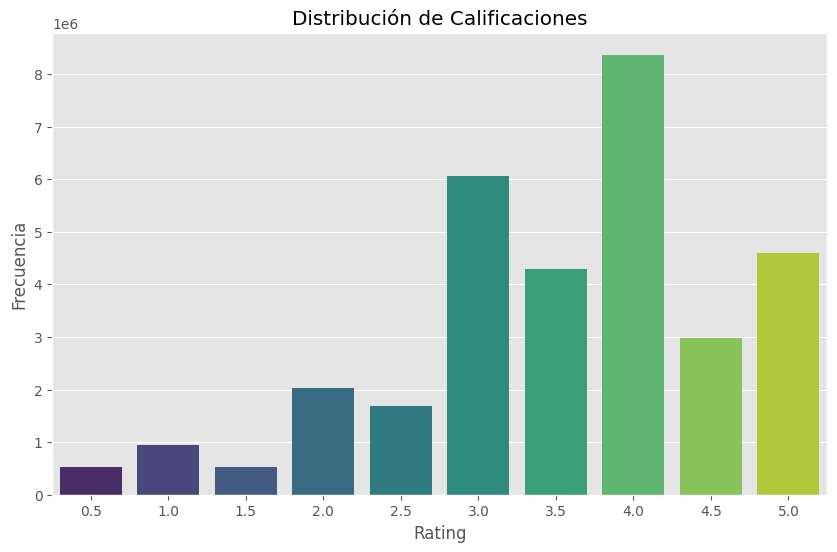

In [14]:
# Análisis estadístico básico de ratings
print("Estadísticas descriptivas de ratings:")
display(ratings['rating'].describe())

# Distribución de ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribución de Calificaciones')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

La mediana (3.5) es ligeramente menor que la media (3.54), sugiriendo una leve asimetría negativa, osea los usuarios tienden a calificar más alto que bajo

Distribucion en los datos

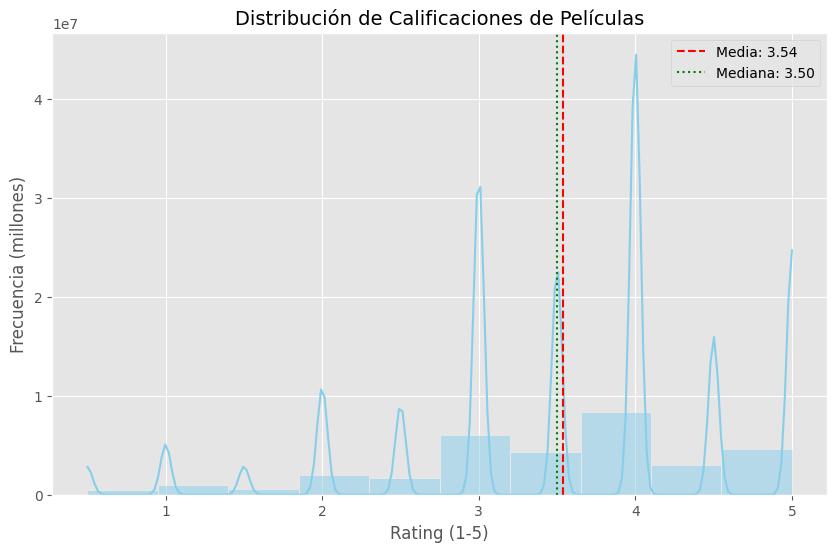

In [15]:

plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True, color='skyblue')

# Líneas de referencia
plt.axvline(ratings['rating'].mean(), color='red', linestyle='--', label=f'Media: {ratings["rating"].mean():.2f}')
plt.axvline(ratings['rating'].median(), color='green', linestyle=':', label=f'Mediana: {ratings["rating"].median():.2f}')

plt.title('Distribución de Calificaciones de Películas', fontsize=14)
plt.xlabel('Rating (1-5)', fontsize=12)
plt.ylabel('Frecuencia (millones)', fontsize=12)
plt.legend()
plt.show()

Los usuarios tienden a calificar en múltiplos de 0.5 (pocos ratings como 2.3 o 3.7)

### 4. Preprocesamiento Técnico

Filtrado de datos por almacenamiento

In [ ]:
# Umbrales estrictos para reducir dimensionalidad
min_user_ratings = 100  # Solo usuarios muy activos
min_movie_ratings = 200  # Solo películas muy populares

# Filtrar usuarios
active_users = ratings['userId'].value_counts()[lambda x: x >= min_user_ratings].index

# Filtrar películas
popular_movies = ratings['movieId'].value_counts()[lambda x: x >= min_movie_ratings].index

# Aplicar filtros
ratings_filtered = ratings[
    ratings['userId'].isin(active_users) & 
    ratings['movieId'].isin(popular_movies)
].copy()

Normalización por Usuario

Mitiga el efecto de usuarios "generosos" (que siempre califican alto) vs "críticos" (que califican bajo)

In [19]:
# Calcular medias por usuario de forma óptima
user_means = ratings_filtered.groupby('userId')['rating'].transform('mean')

# Normalizar sin crear columnas temporales
ratings_filtered['norm_rating'] = ratings_filtered['rating'] - user_means

Creación de matriz dispersa optimizada

In [65]:
ratings_filtered['user_cat'] = ratings_filtered['userId'].astype('category').cat.codes
ratings_filtered['movie_cat'] = ratings_filtered['movieId'].astype('category').cat.codes

sparse_matrix = csr_matrix(
    (ratings_filtered['norm_rating'],
     (ratings_filtered['user_cat'], ratings_filtered['movie_cat'])),
    shape=(len(ratings_filtered['userId'].unique()), 
           len(ratings_filtered['movieId'].unique()))
)

###  5. Entrenamiento del Modelo KNN

Configuración inicial de KNN

In [64]:
knn_model = NearestNeighbors(
    metric='cosine',      # Métrica de similitud
    algorithm='brute',    # Algoritmo para sparse matrices
    n_neighbors=50,       # Número de recomendaciones
    n_jobs=1             # Usar todos los núcleos del CPU
)

# Entrenar con la matriz dispersa TRANSPUESTA (para similitud ítem-ítem)


In [55]:
# (Asumiendo que sparse_matrix ya está definida del paso anterior)
knn_model.fit(sparse_matrix.T)  # Forma: (n_peliculas, n_usuarios)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=4, n_neighbors=50)

Función de Recomendación

In [70]:
def get_movie_recommendations(movie_id, n_recommendations=10):
    """
    Obtiene películas similares usando KNN.
    
    Args:
        movie_id (int): ID de la película de referencia
        n_recommendations (int): Número de recomendaciones a generar
        
    Returns:
        DataFrame con columns: movieId, title, genres, similarity
    """
    try:
        # Verificar si el modelo está entrenado
        if not hasattr(knn_model, '_fit_method'):
            raise ValueError("El modelo KNN no ha sido entrenado. Ejecuta knn_model.fit() primero.")
            
        # Convertir movie_id a índice
        movie_idx = movie_index.get(movie_id)
        if movie_idx is None:
            raise ValueError(f"La película ID {movie_id} no existe en el conjunto de datos")
        
        # Obtener recomendaciones
        distances, indices = knn_model.kneighbors(
            sparse_matrix.T[movie_idx].reshape(1, -1),
            n_neighbors=n_recommendations + 1
        )
        
        # Procesar resultados
        recommendations = []
        movie_ids = list(movie_index.keys())
        
        for i in range(1, len(indices.flatten())):
            rec_movie_id = movie_ids[indices.flatten()[i]]
            similarity = 1 - distances.flatten()[i]  # Convertir distancia a similitud
            recommendations.append({
                'movieId': rec_movie_id,
                'similarity': similarity
            })
        
        # Crear DataFrame y unir metadatos
        rec_df = pd.DataFrame(recommendations)
        return rec_df.merge(movies, on='movieId').sort_values('similarity', ascending=False)
    
    except Exception as e:
        print(f"❌ Error generando recomendaciones: {str(e)}")
        return None

 Verificar que Todo Funcione

In [71]:
# 1. Verificar que sparse_matrix existe
print(f"Dimensiones de sparse_matrix: {sparse_matrix.shape}")

# 2. Verificar que movie_index existe
print(f"Número de películas en movie_index: {len(movie_index)}")

# 3. Probar con una película conocida (ej: Toy Story ID 1)
if 1 in movie_index:
    recs = get_movie_recommendations(1)
    if recs is not None:
        display(recs[['title', 'genres', 'similarity']].head())
    else:
        print("No se pudieron generar recomendaciones")
else:
    print("Toy Story no está en el conjunto filtrado")

Dimensiones de sparse_matrix: (80675, 9322)
Número de películas en movie_index: 9322


,title,genres,similarity
0,Airplane II: The Sequel (1982),Comedy,0.106117
1,"Gods Must Be Crazy, The (1980)",Adventure|Comedy,0.083559
2,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy,0.079946
3,Dances with Wolves (1990),Adventure|Drama|Western,0.079869
4,"Return of Martin Guerre, The (Retour de Martin...",Drama,0.079032


### 6: Evaluación del Modelo

In [72]:

# 1. Verificar que sparse_matrix existe
print(f"Dimensiones de sparse_matrix: {sparse_matrix.shape}")

# 2. Verificar que movie_index existe
print(f"Número de películas en movie_index: {len(movie_index)}")

# 3. Probar con una película conocida (ej: Toy Story ID 1)
if 1 in movie_index:
    recs = get_movie_recommendations(1)
    if recs is not None:
        display(recs[['title', 'genres', 'similarity']].head())
    else:
        print("No se pudieron generar recomendaciones")
else:
    print("Toy Story (ID 1) no está en el índice de películas")


Dimensiones de sparse_matrix: (80675, 9322)
Número de películas en movie_index: 9322


,title,genres,similarity
0,Airplane II: The Sequel (1982),Comedy,0.106117
1,"Gods Must Be Crazy, The (1980)",Adventure|Comedy,0.083559
2,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy,0.079946
3,Dances with Wolves (1990),Adventure|Drama|Western,0.079869
4,"Return of Martin Guerre, The (Retour de Martin...",Drama,0.079032


In [73]:

from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

def evaluate_model(ratings_filtered, n_tests=100, n_recommendations=5):
    """
    Evalúa el modelo usando leave-one-out optimizado

    Args:
        ratings_filtered: DataFrame con ratings filtrados
        n_tests: Número de pruebas a realizar
        n_recommendations: Número de recomendaciones por prueba

    Returns:
        hit_rate: Porcentaje de aciertos
    """
    hits = 0
    total = 0

    # Seleccionar usuarios válidos
    users = ratings_filtered['userId'].unique()
    for _ in tqdm(range(n_tests), desc="Evaluando modelo"):
        user = np.random.choice(users)
        user_ratings = ratings_filtered[ratings_filtered['userId'] == user]
        if len(user_ratings) < 2:
            continue

        test_rating = user_ratings.sample(1)
        train_ratings = user_ratings.drop(test_rating.index)

        # Crear conjunto de entrenamiento temporal
        temp_ratings = ratings_filtered[ratings_filtered['userId'] != user].copy()
        temp_ratings = pd.concat([temp_ratings, train_ratings])

        # Recomendar para la película que dejó fuera
        movie_id = test_rating['movieId'].values[0]
        recommendations = get_movie_recommendations(movie_id)

        if recommendations is not None:
            recommended_ids = recommendations.head(n_recommendations)['movieId'].values
            if movie_id in recommended_ids:
                hits += 1
            total += 1

    hit_rate = hits / total if total > 0 else 0
    return hit_rate


In [ ]:

# Ejecutar evaluación (100 pruebas)
hit_rate = evaluate_model(
    ratings_filtered=ratings_filtered,
    n_tests=100,
    n_recommendations=5
)

print(f"Hit Rate del Modelo: {hit_rate:.2%}")


Evaluando modelo: 100%|██████████| 100/100 [04:35<00:00,  2.76s/it]

🎯 Hit Rate del Modelo: 0.00%
